# Download and view DEM files from GSX

Browse through the GSX catalogue for the DEM file having id 
``` datakaveri.org/254ee63ac91d837f550784d6512990e23d30549b/soi.iudx.io/digital_elevation_bengaluru/blr_dem_57g8 ```


In [2]:
resource_id = "datakaveri.org/254ee63ac91d837f550784d6512990e23d30549b/soi.iudx.io/digital_elevation_bengaluru/blr_dem_57g8"

In [3]:
# Necessary imports
import ipywidgets
import requests

# We use xarray to handle multiband raster netcdf images
import xarray as xr


### Authorization section
Input your client credentials and obtain access token to the DEM File
At the end of this section, you will receive the access token "token" to access this private resource

In [4]:
# Widget to accept client credentials
clientid_widget = ipywidgets.Password(description='ClientID:', placeholder='ClientID')
clientsecret_widget = ipywidgets.Password(description='ClientSecret:', placeholder='ClientSecret')

In [5]:
# Invoke client id widget
clientid_widget

Password(description='ClientID:', placeholder='ClientID')

In [6]:
# Invoke client secret widget
clientsecret_widget

Password(description='ClientSecret:', placeholder='ClientSecret')

In [7]:
headers = {"clientId": clientid_widget.value, "clientSecret": clientsecret_widget.value}
body = {

    "itemId": resource_id,
    "itemType": "resource",
    "role": "consumer"

}
token = requests.post("https://authvertx.iudx.io/auth/v1/token", json=body, headers=headers).json()["results"]["accessToken"]

### Data Access Section

We use the GSX collections api to point to the specific resource and the `/coverage` endpoint to access the resource as an OGC coverage resource. Mentioning the filetype with `f=netcdf` allows you to download it as a NetCDF format file.

In [8]:
url = 'https://soi.iudx.io/ogc/v1/collections/' + resource_id + '/coverage?f=netcdf'
headers = {"token": token}
r = requests.get(url, headers=headers, allow_redirects=True)
open('./57g8.nc', 'wb').write(r.content)

31934618

### Data Visualization Section
We use Xarray to open the downloaded NetCDF file, perform a small amount of metadata manipulation and finally plot the raster data

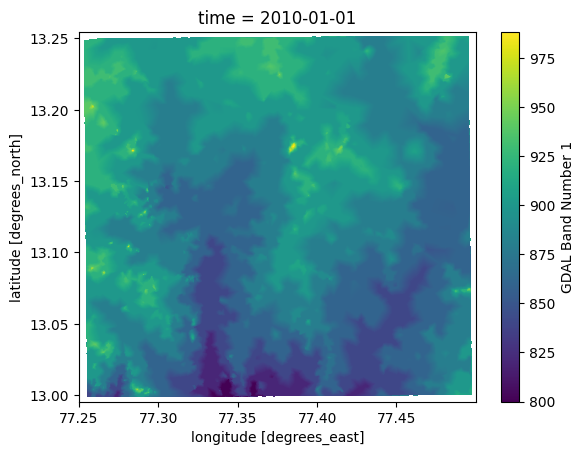

In [9]:
ds = xr.open_dataset("./57g8.nc")
ds = ds.sel(time='2010-01-01T00:00:00.000000000')
ds = ds.rename({"lat": "y", "lon": "x"})
ds["Band1"].plot()